<a href="https://colab.research.google.com/github/abhi1ranjan/ML-Algorithm_Practise/blob/main/Linear_Discriminant_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
# Step 1: Generate a sample dataset
# Let's create a dataset with two classes for simplicity
np.random.seed(0)
class1 = np.random.multivariate_normal([2, 2], [[1, 0.5], [0.5, 1]], 50)
class2 = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 50)
X = np.vstack((class1, class2))
y = np.array([0]*50 + [1]*50)  # Labels: 0 for class1, 1 for class2


In [ ]:
# Step 2: Compute the mean of each class
mean_class1 = np.mean(class1, axis=0)
mean_class2 = np.mean(class2, axis=0)
overall_mean = np.mean(X, axis=0)



In [ ]:
print(mean_class1)
print(mean_class2)

[1.9340405  2.03685037]
[-0.07516042  0.10758705]


In [ ]:
# Step 3: Compute the within-class scatter matrix (Sw)
Sw = np.zeros((2, 2))
for i in range(len(X)):
    if y[i] == 0:
        Sw += (X[i] - mean_class1).reshape(2, 1).dot((X[i] - mean_class1).reshape(1, 2))
    else:
        Sw += (X[i] - mean_class2).reshape(2, 1).dot((X[i] - mean_class2).reshape(1, 2))

# Step 4: Compute the between-class scatter matrix (Sb)
Sb = (mean_class1 - mean_class2).reshape(2, 1).dot((mean_class1 - mean_class2).reshape(1, 2))

In [ ]:
print(Sw)
print(Sb)

[[101.96659181  52.5490933 ]
 [ 52.5490933  106.15993773]]
[[4.03688833 3.87627763]
 [3.87627763 3.72205695]]


In [ ]:
# Step 5: Compute the optimal projection vector
# We need to solve the eigenvalue problem for inv(Sw) * Sb
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
# Eigenvector with the largest eigenvalue will be our best direction
optimal_vector = eigvecs[:, np.argmax(eigvals)]

### Why Projection is Needed in LDA?

In LDA, the goal is to find the direction in the feature space that best separates the classes. Once we have this direction, projecting the data onto it allows us to reduce the dimensionality of the data to a single axis, where the separation between the classes should be maximized. In this one-dimensional space, we can use a simple threshold to distinguish between the classes, which makes classification easier and potentially more accurate.

### Understanding the Projection Step
* Optimal Vector (optimal_vector): This is the direction vector calculated in the eigenvalue decomposition step. It points in the direction that maximizes the separation between the class means while minimizing the within-class variance.

* Dot Product: The dot product operation X.dot(optimal_vector) projects each data point in X onto this optimal direction. Mathematically, when we take the dot product of a vector with another vector (like optimal_vector), it measures the component of that vector along the direction of optimal_vector.

* Reduced Dimensionality: If X originally has multiple features (like two features in this example), projecting onto optimal_vector reduces each data point from a multi-dimensional point to a single scalar value. This scalar represents the position of the data point along the direction of maximum separation.

In [ ]:
cx# Step 6: Project data onto the new feature space
X_projected = X.dot(optimal_vector)

# Step 7: Classify the points based on the projected values
# Set a threshold for classification (can use midpoint of class means in projected space)
threshold = (mean_class1.dot(optimal_vector) + mean_class2.dot(optimal_vector)) / 2
predictions = (X_projected >= threshold).astype(int)

### Result
After the projection, X_projected will contain one value per data point, representing its location on the line defined by optimal_vector. In this new space, points from different classes should ideally cluster around different mean values, allowing us to classify them by setting a threshold (as done in the next steps).

In [ ]:
# Step 8: Print results and plot (optional)
print("Optimal projection vector (w_LDA):", optimal_vector)
print("Classification threshold:", threshold)
print("Predictions:", predictions)

Optimal projection vector (w_LDA): [0.77541062 0.63145734]
Classification threshold: 1.3977580523297095
Predictions: [0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


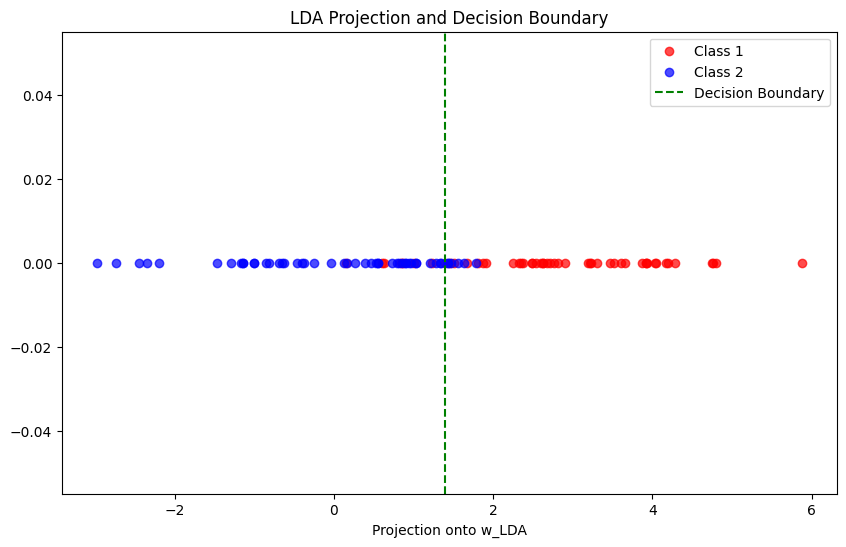

In [ ]:
# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_projected[y == 0], np.zeros(50), color='red', label='Class 1', alpha=0.7)
plt.scatter(X_projected[y == 1], np.zeros(50), color='blue', label='Class 2', alpha=0.7)
plt.axvline(threshold, color='green', linestyle='--', label='Decision Boundary')
plt.title("LDA Projection and Decision Boundary")
plt.xlabel("Projection onto w_LDA")
plt.legend()
plt.show()

## An implementation of LDA with dataset of 5 classes and data points are in 4 dimensions.

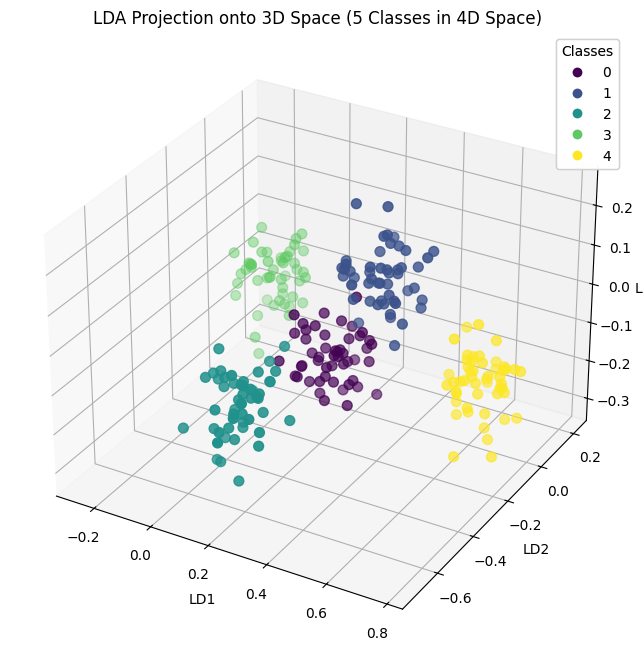

In [ ]:
from scipy.linalg import eigh

# Step 1: Generate synthetic dataset
np.random.seed(0)
n_features = 4  # 4-dimensional feature space
n_classes = 5   # 5 classes
n_samples_per_class = 50

# Generate random means for each class in 4D space
class_means = np.random.rand(n_classes, n_features) * 10

# Generate samples for each class
X = []
y = []
for i in range(n_classes):
    X_class = np.random.multivariate_normal(class_means[i], np.eye(n_features), n_samples_per_class)
    X.append(X_class)
    y.append([i] * n_samples_per_class)

X = np.vstack(X)
y = np.hstack(y)

# Step 2: Compute the within-class scatter matrix (Sw) and the between-class scatter matrix (Sb)
overall_mean = np.mean(X, axis=0)
Sw = np.zeros((n_features, n_features))
Sb = np.zeros((n_features, n_features))

for i in range(n_classes):
    X_class = X[y == i]
    class_mean = np.mean(X_class, axis=0)

    # Within-class scatter
    Sw += (X_class - class_mean).T @ (X_class - class_mean)

    # Between-class scatter
    n_samples = X_class.shape[0]
    mean_diff = (class_mean - overall_mean).reshape(-1, 1)
    Sb += n_samples * (mean_diff @ mean_diff.T)

# Step 3: Solve the generalized eigenvalue problem for (Sb, Sw)
eigvals, eigvecs = eigh(Sb, Sw)

# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigvals)[::-1]
eigvals = eigvals[sorted_indices]
eigvecs = eigvecs[:, sorted_indices]

# Step 4: Select the top k eigenvectors (for 5 classes, k = n_classes - 1 = 4)
k = n_classes - 1
W = eigvecs[:, :k]  # Transformation matrix with top k eigenvectors

# Step 5: Project the data onto the new feature space
X_projected = X @ W

# Step 6: Visualize the first three dimensions of the projected data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_projected[:, 0], X_projected[:, 1], X_projected[:, 2], c=y, cmap='viridis', s=50)
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)
plt.title("LDA Projection onto 3D Space (5 Classes in 4D Space)")
plt.xlabel("LD1")
plt.ylabel("LD2")
ax.set_zlabel("LD3")
plt.show()


## Comparison of PCA and LDA on IRIS dataset

PCA:- explained variance ratio (first two components): [0.92461872 0.05306648]
LDA:- explained variance ratio (first two components): [0.9912126 0.0087874]


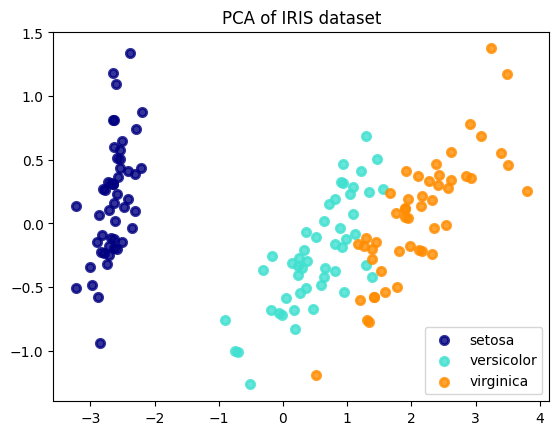

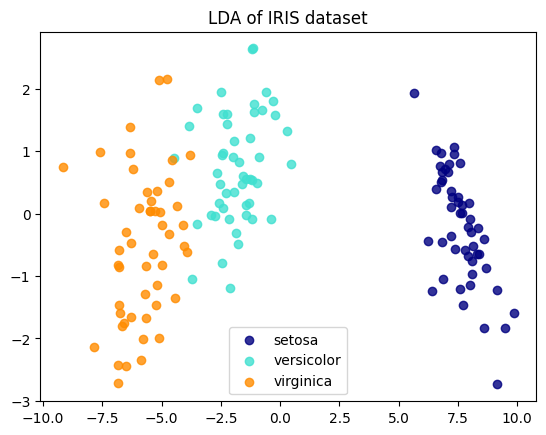

In [3]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "PCA:- explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

print(
    "LDA:- explained variance ratio (first two components): %s"
    % str(lda.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()